# Imports and stuff

In [63]:
import pandas as pd

In [64]:
BATCH_SIZES = ["16", "32", "64", "128", "256", "512", "1024", "2048", "4096"]

# Cost Breakdown of FPGA Integration

Here we try to bound the overhead when using the FPGA.

As you may know, using the FPGA involves more than just "compute".
Data needs to be copied, the driver needs to communicate with the FPGA, and more.

The analysis is performed on the SLP model.

## TL;DR: Time Breakdown

In [97]:
df_time_breakdown = pd.DataFrame({
    'Total': df_total.set_axis(BATCH_SIZES, axis='columns').median(),
    'FPGA compute': df_compute.set_axis(BATCH_SIZES, axis='columns').median(),
    'FPGA prepare': df_prepare.set_axis(BATCH_SIZES, axis='columns').median(),
    'Reconf cache': df_cache.set_axis(BATCH_SIZES, axis='columns').median(),
    'Input quant': df_quant.set_axis(BATCH_SIZES, axis='columns').median(),
    'Input copy': df_incopy.set_axis(BATCH_SIZES, axis='columns').median(),
    'Output dequant': df_dequant.set_axis(BATCH_SIZES, axis='columns').median(),
})

# the remaining falls into other-overhead
df_time_breakdown['Other overhead'] = df_time_breakdown['Total'] - df_time_breakdown[df_time_breakdown.columns[1:]].sum(axis=1)

display(df_time_breakdown)

,Total,FPGA compute,FPGA prepare,Reconf cache,Input quant,Input copy,Output dequant,Other overhead
16,187292.0,15956.5,29571.0,11978.0,43064.5,7278.0,32084.0,47360.0
32,213492.0,24140.5,29295.5,11411.0,58114.0,8517.5,32896.5,49117.0
64,261894.5,39429.5,30799.5,12929.0,59160.5,20292.0,33656.0,65628.0
128,294456.5,70648.5,30227.0,12480.5,68505.0,21357.5,34259.5,56978.5
256,378453.0,135621.5,30429.0,12850.5,74569.0,21111.0,36333.5,67538.5
512,548730.5,263038.0,30767.0,12776.0,91824.5,20476.5,40784.5,89064.0
1024,992051.0,536184.0,31884.5,12803.0,262514.5,27282.0,49695.0,71688.0
2048,1671808.5,1076416.0,33694.5,12149.0,368606.5,44772.0,64287.5,71883.0
4096,3251889.5,2109856.5,56067.0,22534.0,587979.0,60983.0,118097.5,296372.5


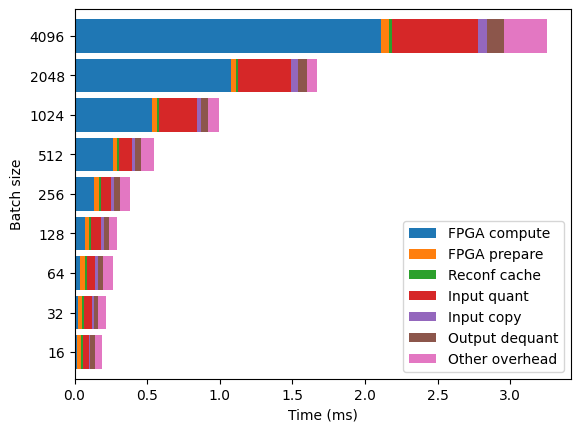

In [100]:
ax = (df_time_breakdown[
      df_time_breakdown.columns[1:]
] / 1_000_000).plot.barh(width=0.85, stacked=True)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Batch size')
pass

## Total Time

In [80]:
df_total = pd.read_csv('diagrams/server_metrics_old/simple_slp/shir_fpga_buf.csv')
display(df_total)

,SHIR FPGA (buffered) b16,SHIR FPGA (buffered) b32,SHIR FPGA (buffered) b64,SHIR FPGA (buffered) b128,SHIR FPGA (buffered) b256,SHIR FPGA (buffered) b512,SHIR FPGA (buffered) b1024,SHIR FPGA (buffered) b2048,SHIR FPGA (buffered) b4096
0,203294,225773,268056,305197,380622,583449,1045377,2089697,4274032
1,192569,227416,268388,295018,380300,539335,971301,1673651,3334443
2,191860,216853,274127,302190,386266,546503,944157,1713388,3093660
3,188008,223545,262859,292634,375549,551674,1017814,1665326,3031725
4,190514,215197,263671,294286,379033,544151,958458,1654374,3065666
...,...,...,...,...,...,...,...,...,...
995,187430,211442,258357,290287,374868,546085,838000,1752113,4069960
996,185116,211899,262057,292656,390557,566131,861697,1685976,3336466
997,186633,213243,265788,293864,395018,573132,860108,1719548,3268398
998,185782,214616,267417,296689,381881,543319,862066,1709122,3142641


## FPGA Compute

This involves starting the compute and waiting for the FPGA to finish.

In [72]:
df_compute = pd.read_csv('diagrams/server_metrics_old/simple_slp/shir_fpga_buf_compute.csv')
display(df_compute)

,b16,b32,b64,b128,b256,b512,b1024,b2048,b4096
0,33065,38544,55364,91771,164839,309018,607180,1200349,2348553
1,17545,28479,43248,76080,147640,285883,550597,1081343,2138806
2,18355,26726,42359,76330,147332,281563,556061,1097464,2177559
3,18807,27856,43955,76245,142985,281286,550856,1083588,2134942
4,18288,27031,44456,76238,145596,263027,547442,1070747,2106557
...,...,...,...,...,...,...,...,...,...
995,14699,23079,39103,69478,137718,259665,514516,1074933,2117668
996,15973,24192,37558,69649,137674,257681,512691,1097682,2129350
997,15796,23143,40219,69839,138824,258073,517373,1094850,2104912
998,15733,22770,38408,72394,139226,258813,515722,1079738,2102080


## FPGA Prepare

This involves mapping the preallocated buffer and resetting the counters (which presently involves resetting the state of the entire FPGA).

In [71]:
df_prepare = pd.read_csv('diagrams/server_metrics_old/simple_slp/shir_fpga_buf_prepare.csv')
display(df_prepare)

,b16,b32,b64,b128,b256,b512,b1024,b2048,b4096
0,92731,96607,100556,94325,98674,94562,99003,103529,111564
1,62012,63554,68572,63529,66524,61562,66140,68921,89019
2,54270,57250,62151,56628,55743,54538,54059,55236,80380
3,52631,56312,61212,52671,54845,51265,49428,47964,72436
4,52183,55236,57561,52162,52722,48966,47719,44171,55626
...,...,...,...,...,...,...,...,...,...
995,28075,28953,30401,30281,30729,30661,31754,36154,62126
996,28204,28690,29376,30413,31933,32505,31843,34702,64720
997,28234,28737,29637,30008,30147,30332,31659,33388,72766
998,28485,28804,29937,29946,30974,30611,31759,33407,70833


## Reconfiguration Cache

This involves checking if the FPGA has been reconfigured to the same thing (using a ad-hoc global variable).

In [73]:
df_cache = pd.read_csv('diagrams/server_metrics_old/simple_slp/shir_fpga_buf_cache.csv')
display(df_cache)

,b16,b32,b64,b128,b256,b512,b1024,b2048,b4096
0,4083994295,4238838715,4090486470,4083148762,4087858975,3928440858,3930587656,4242038655,3932773740
1,48232,54542,51631,50689,58917,49388,46742,44128,43286
2,30351,34933,33615,35539,38389,32643,28959,29658,38994
3,29381,33719,31004,30936,32748,27236,24663,22542,34873
4,27854,33062,30634,30062,33202,27848,22776,19649,19375
...,...,...,...,...,...,...,...,...,...
995,10993,10833,11575,12595,12444,12523,12494,12059,19855
996,10716,10713,11612,12448,12506,13550,12570,27731,18225
997,10777,10337,11716,12302,12487,12299,12207,18051,18680
998,10678,11091,11796,16421,13871,12839,12534,14081,17488


## Input Quantization

In the SLP case, the input images need to be quantized.
Right now, this is done on host, so it is **not** part of the FPGA compute cost.

In [75]:
df_quant = pd.read_csv('diagrams/server_metrics_old/simple_slp/shir_fpga_buf_quant.csv')
display(df_quant)

,b16,b32,b64,b128,b256,b512,b1024,b2048,b4096
0,292857,328733,423879,510277,550551,652823,739443,788208,1479991
1,101588,136133,143203,159292,185665,201728,372224,545433,1363280
2,83307,109891,128765,149242,165351,199626,309415,489280,1521836
3,86146,113873,124305,132733,135142,154839,295335,453441,778566
4,86606,110497,124715,126828,132486,151945,301959,548051,691176
...,...,...,...,...,...,...,...,...,...
995,42251,55747,58047,68832,75497,96379,202441,436749,589242
996,40497,55486,59145,68195,74079,93205,185912,331657,584531
997,41005,53360,57159,68844,78291,88617,222689,366993,620897
998,48039,56600,66145,69058,73390,89232,219288,347276,1500983


## Input Copy

Again, in the SLP case, only the input images need to be copied because the weights and biases are copied ahead of time.

Note that this copy happens after quantization.

In [79]:
df_incopy = pd.read_csv('diagrams/server_metrics_old/simple_slp/shir_fpga_buf_incopy.csv')
display(df_incopy)

,b16,b32,b64,b128,b256,b512,b1024,b2048,b4096
0,12717,16235,27619,30408,29525,34478,45042,62756,101535
1,26779,31991,42652,44695,46171,45120,59584,74737,79647
2,18703,22576,35492,36559,37450,37354,42071,46152,109587
3,18568,20671,34633,36042,49110,34029,42073,40636,103546
4,17961,21380,31861,32533,34101,31157,35107,47204,65126
...,...,...,...,...,...,...,...,...,...
995,6632,8005,21184,20374,19684,19334,28164,38475,55378
996,6731,7993,20478,21532,21576,19208,31302,61081,59053
997,6681,7990,20414,19547,19287,18593,28132,44420,49363
998,6573,8112,20241,31584,20180,21566,27851,50450,77906


## Output Dequantization

Like the input images, the output prediction needs to be dequantized (which also implicitly copies).

In [76]:
df_dequant = pd.read_csv('diagrams/server_metrics_old/simple_slp/shir_fpga_buf_dequant.csv')
display(df_dequant)

,b16,b32,b64,b128,b256,b512,b1024,b2048,b4096
0,521105,500499,467187,530935,481855,557557,520293,555539,550945
1,67396,72818,74346,82304,84118,92825,102011,127850,191614
2,59823,67902,68234,76765,71509,78917,87890,109698,149604
3,62775,66699,69437,70156,66709,74904,76236,94529,135058
4,63087,66564,70915,72787,67096,70904,72516,87472,118164
...,...,...,...,...,...,...,...,...,...
995,28012,31521,32643,32401,38801,40190,49462,53728,117994
996,29472,32362,31972,32725,35421,42762,51284,89474,112889
997,29713,32695,32872,33026,36940,40105,50173,77517,116031
998,28552,31926,31099,33799,34776,39139,48486,64271,110636
